In [63]:
#Handle all major imports
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
#Load the PIMA Dataset
dataset = pd.read_csv('data/pima_diabetes_clean.csv')

In [33]:
#Describe the dataset
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

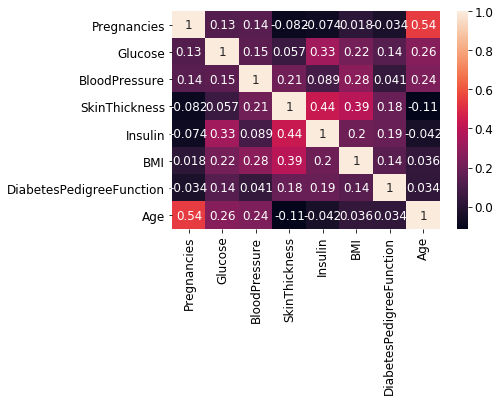

In [34]:
#View The Correlation matrix
sns.heatmap(X.corr(), annot = True)


In [35]:
#Feature Extraction
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
[  6.  148.   72.   35.    0.   33.6  50. ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6      148             72             35        0  33.6   50
1            1       85             66             29        0  26.6   31
2            8      183             64              0        0  23.3   32
3            1       89             66             23       94  28.1   21
4            0      137             40             35      168  43.1   33
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [72]:
#Splitting the dataset 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Glucose  Insulin   BMI  Age
603      150      126  35.2   54
118       97        0  28.2   22
247      165      680  52.3   23
157      109      135  25.2   23
468      120        0  30.0   38
193      135        0  52.3   40
306      161      132  25.5   47
319      194        0  23.5   59
97        71       76  20.4   22
530      122      106  29.8   22
327      179        0  35.1   37
619      119        0  32.4   24
518       76        0  32.8   41
632      111        0  26.2   23
524      125        0  31.6   24
536      105        0  29.6   46
597       89       25  27.8   21
462       74       49  35.3   39
17       107        0  29.6   31
739      102        0  39.5   42
263      142        0  32.4   63
241       91       88  33.1   22
344       95        0  36.8   57
302       77       42  35.8   35
704      110      100  28.4   27
240       91        0  29.2   21
170      102        0  30.8   36
691      158        0  42.3   44
490       83       66  36.8   24
45       1

In [69]:
#Scaling the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
#Implementing Gaussian NB Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [39]:
#Predicting the test Set results
y_pred = classifier.predict(X_test)


In [40]:
#Evaluating the Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[97 10]
 [22 25]]
0.6097560975609756
0.7922077922077922


In [41]:
#Saving the Confusion Matrix and splitting into 4 variables 
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[97 10]
 [22 25]]


In [42]:
#Calculating Model Accuracy from the Confusion Matrix
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.7922077922077922
0.7922077922077922


In [43]:
#Calculating Classification Error from the Confusion Matrix
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.2077922077922078
0.20779220779220775


In [44]:
#Calculate Sensitivity from the Confusion Matrix
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.5319148936170213
0.5319148936170213


In [45]:
#Calculate Specificity from the Confusion Matrix
specificity = TN / (TN + FP)

print(specificity)

0.9065420560747663


In [46]:
#Calculate the False Positive Rate from the Confusion Matrix
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)


0.09345794392523364
0.09345794392523366


In [47]:
#Calcualte Precision from the Confusion Matrix
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.7142857142857143
0.7142857142857143


In [48]:
#Steps for adjusting the Threshold
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
classifier.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [49]:
# print the first 10 predicted probabilities of class membership
classifier.predict_proba(X_test)[0:10]

array([[0.03082556, 0.96917444],
       [0.87643626, 0.12356374],
       [0.92255338, 0.07744662],
       [0.20841247, 0.79158753],
       [0.91774295, 0.08225705],
       [0.96203847, 0.03796153],
       [0.32856931, 0.67143069],
       [0.06623496, 0.93376504],
       [0.65675664, 0.34324336],
       [0.50883684, 0.49116316]])

In [50]:
# print the first 10 predicted probabilities for class 1
classifier.predict_proba(X_test)[0:10, 1]

array([0.96917444, 0.12356374, 0.07744662, 0.79158753, 0.08225705,
       0.03796153, 0.67143069, 0.93376504, 0.34324336, 0.49116316])

In [51]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

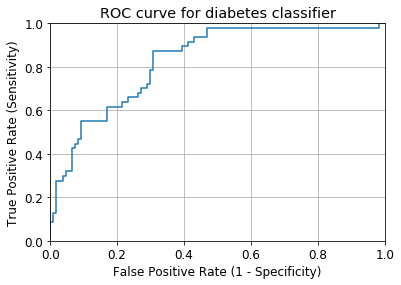

In [52]:
#Plotting ROC Curve
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [53]:
#Finding out the AUC
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8266056870153111


In [54]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, X, y, cv=10, scoring='roc_auc').mean()

0.8154586894586895

In [64]:
sklearn.metrics.log_loss(y_pred, y_pred_prob, eps=1e-15, normalize=True, sample_weight=None, labels=None)

0.20434366794556408